In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv("./data/Bank Customer Churn Prediction.csv")

In [10]:
df.head(
    
)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


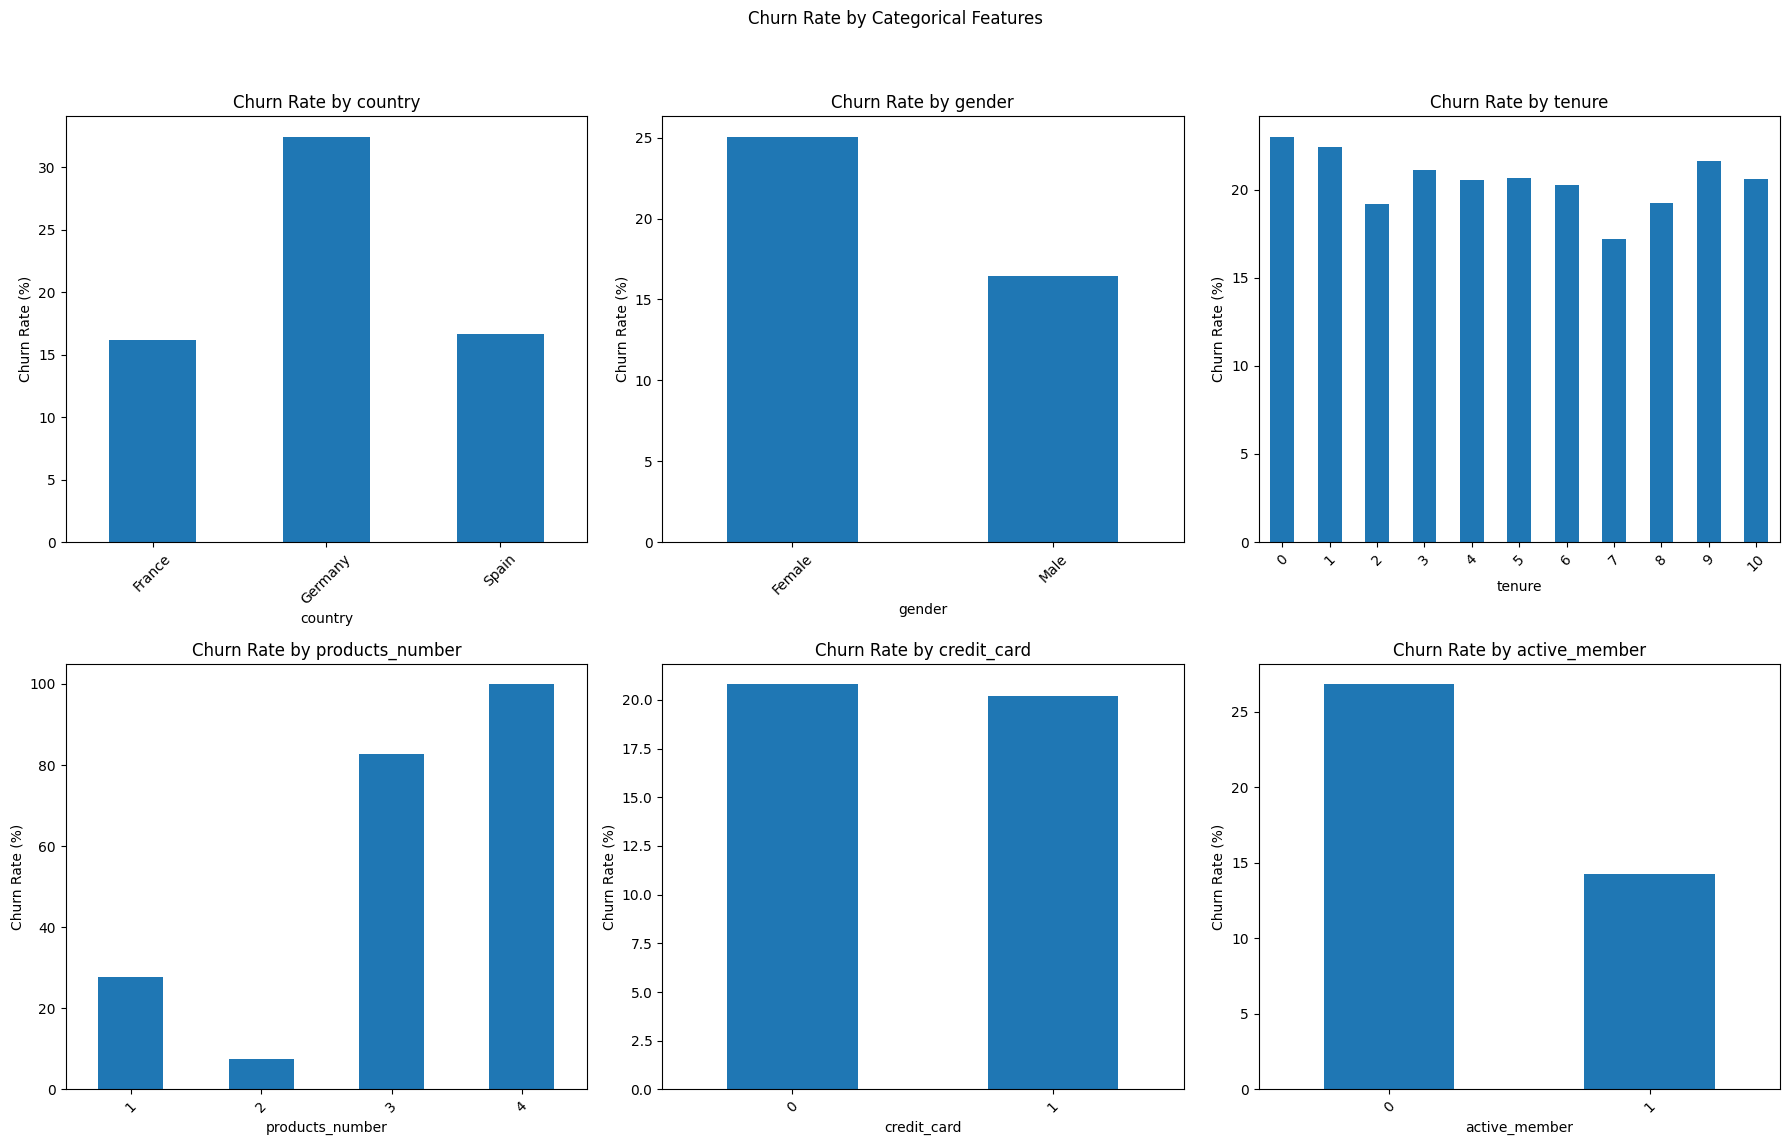

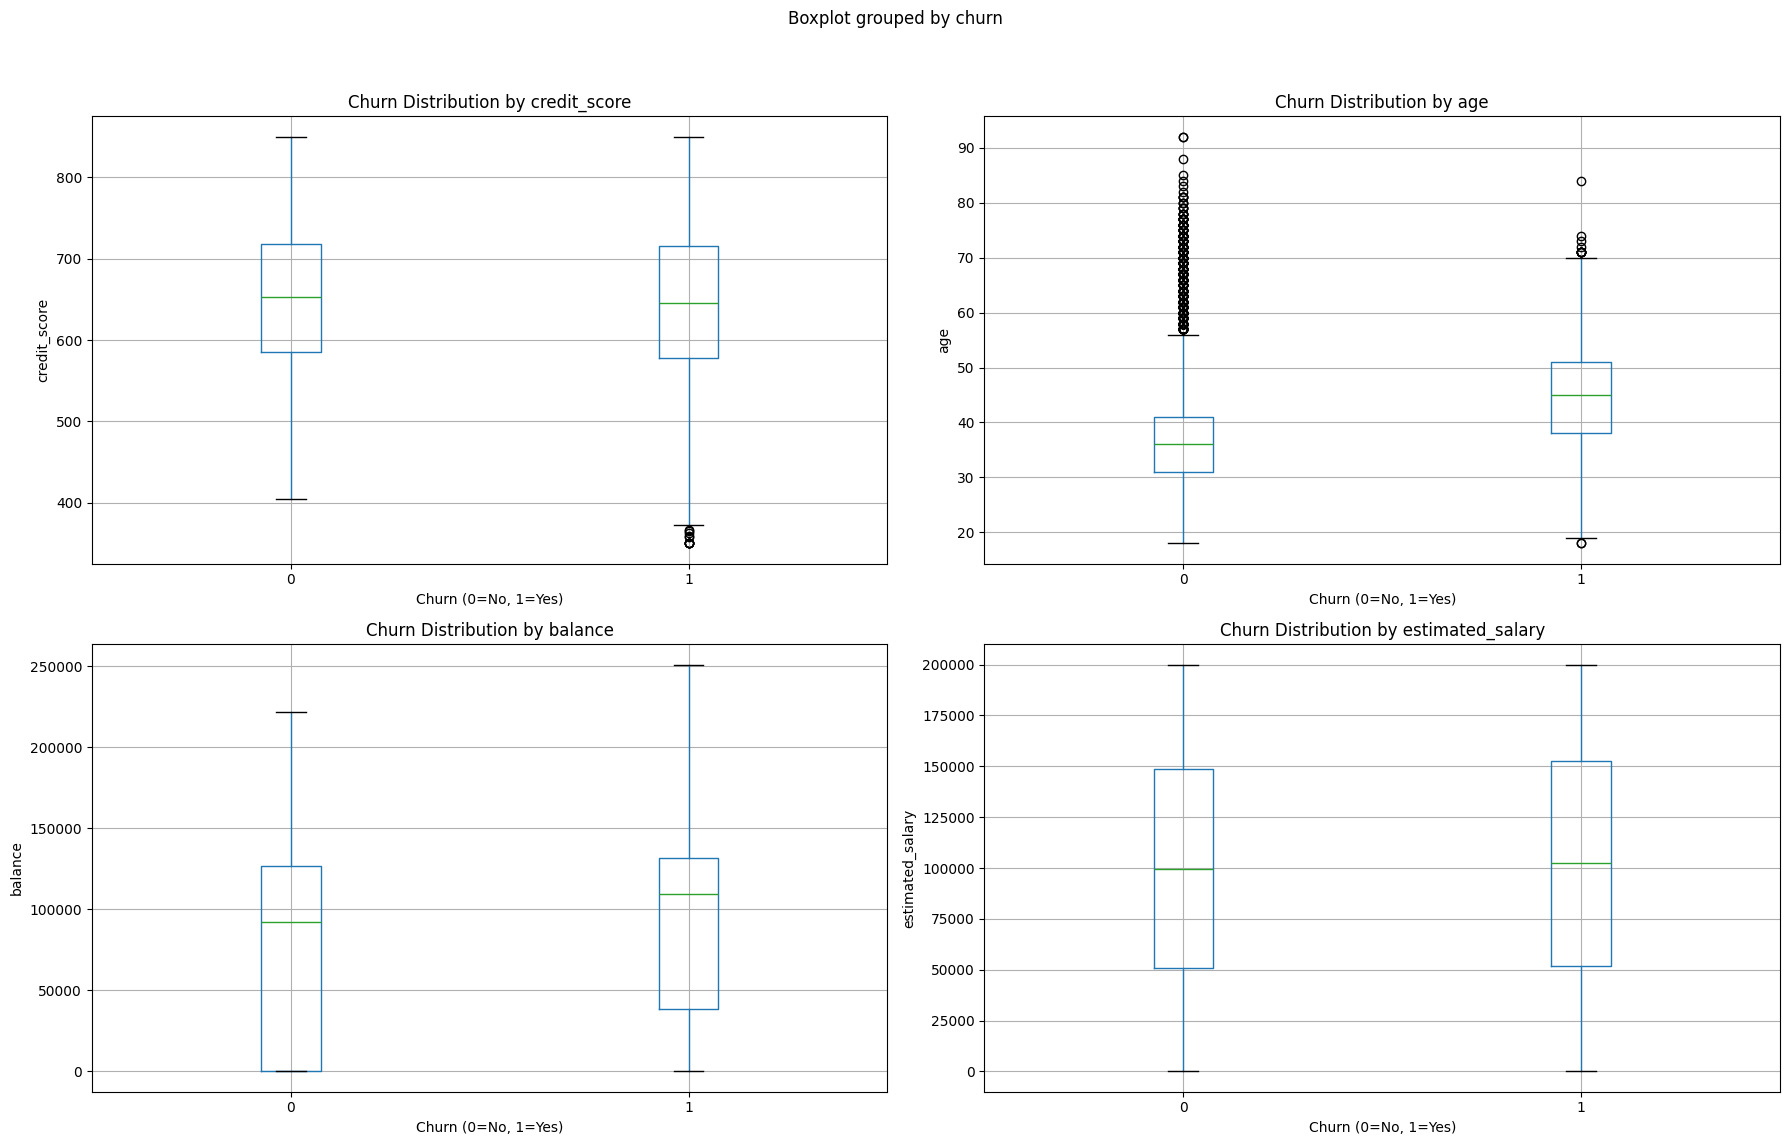

In [13]:
import matplotlib.pyplot as plt

# Identify categorical and numerical columns
categorical_columns = ["country", "gender", "tenure", "products_number", "credit_card", "active_member"]
numerical_columns = ["credit_score", "age", "balance", "estimated_salary"]

# Create subplots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Churn Rate by Categorical Features")

for ax, column in zip(axes.flatten(), categorical_columns):
    churn_rates = df.groupby(column)["churn"].mean() * 100  # Convert to percentage
    churn_rates.plot(kind="bar", ax=ax)
    ax.set_title(f"Churn Rate by {column}")
    ax.set_ylabel("Churn Rate (%)")
    ax.set_xlabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create subplots for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("Churn Rate by Numerical Features")

for ax, column in zip(axes.flatten(), numerical_columns):
    df.boxplot(column=column, by="churn", ax=ax)
    ax.set_title(f"Churn Distribution by {column}")
    ax.set_ylabel(column)
    ax.set_xlabel("Churn (0=No, 1=Yes)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
